# Data Cleaning


In [ ]:
# We open our csv file and convert all column titles to lowercase

import pandas as pd
import numpy as np

df = pd.read_csv("personas.csv", index_col=0)
df.head()

,phone_brand,watch_owner,watch_brand,purchase_year,spent_watch,OS_pair,watch_satisfaction,frequency_wear,churn_reasons,intention_buy,...,goal_health,goals_juggling,transport_walk,transport_cycle,transport_drive,transport_train,transport_bus,transport_taxi,phone_navigate,situation
age,,,,,,,,,,,,,,,,,,,,,
35 - 44,Apple iPhone,Yes,Sense,2020.0,£149 or less,iOS,Somewhat satisfied,Daily,lack of customization,Strongly Considering,...,Somewhat disagree,Strongly agree,Everyday,Not at all,Rarely,A few times a week,Rarely,Rarely,Not at all,Living with significant other
35 - 44,Google Pixel,Yes,Fitbit,2021.0,£149 or less,Android,Somewhat satisfied,Daily,comfort and design,Slightly Considering,...,Neutral,Strongly disagree,Everyday,Not at all,Not at all,A few times a week,Rarely,Rarely,A few times a week,Living with significant other
25 - 34,Apple iPhone,Yes,Mi,2019.0,£149 or less,iOS,Somewhat satisfied,Daily,negative reviews,Slightly Considering,...,Somewhat agree,Somewhat agree,A few times a week,Not at all,A few times a week,A few times a week,Rarely,Rarely,Not at all,Living with children
25 - 34,Google Pixel,No,NaN,NaN,NaN,NaN,NaN,NaN,lack of features,Slightly Considering,...,Neutral,Somewhat agree,A few times a week,Not at all,Not at all,A few times a week,A few times a week,Rarely,A few times a week,Living with significant other
25 - 34,Apple iPhone,Yes,Fitbit,2019.0,£149 or less,Android,Neither satisfied nor dissatisfied,Daily,lack of customization,Strongly Considering,...,Neutral,Somewhat disagree,A few times a week,A few times a month,Not at all,A few times a month,A few times a month,Rarely,A few times a week,Living alone but in a relationship


In [ ]:
# Reset the index and move it back into a regular column
df.reset_index(drop=False, inplace=True)

# Display the DataFrame after resetting the index
print(df.head())

       age   phone_brand watch_owner watch_brand  purchase_year   spent_watch  \
0  35 - 44  Apple iPhone         Yes       Sense         2020.0  £149 or less   
1  35 - 44  Google Pixel         Yes      Fitbit         2021.0  £149 or less   
2  25 - 34  Apple iPhone         Yes          Mi         2019.0  £149 or less   
3  25 - 34  Google Pixel          No         NaN            NaN           NaN   
4  25 - 34  Apple iPhone         Yes      Fitbit         2019.0  £149 or less   

   OS_pair                  watch_satisfaction frequency_wear  \
0      iOS                  Somewhat satisfied          Daily   
1  Android                  Somewhat satisfied          Daily   
2      iOS                  Somewhat satisfied          Daily   
3      NaN                                 NaN            NaN   
4  Android  Neither satisfied nor dissatisfied          Daily   

           churn_reasons  ...        goal_health     goals_juggling  \
0  lack of customization  ...  Somewhat disagree   

In [ ]:
# Check for missing values
print(df.isnull().sum())

age                             0
phone_brand                     0
watch_owner                     0
watch_brand                   255
purchase_year                 227
spent_watch                   227
OS_pair                       227
watch_satisfaction            227
frequency_wear                227
churn_reasons                   0
intention_buy                   0
intention_when                224
intention_price               227
important_reachable             0
important_fitnesstrack          0
important_voicecommands         0
important_sleep                 0
important_emergency             0
important_payment               0
important_smartdevices          0
important_productive            0
important_phone_disconnect      0
important_fashionable           0
important_navigation            0
interested_apple                0
interested_samsung              0
interested_google               0
interested_amazon               0
interested_fitbit               0
interested_fos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         996 non-null    object 
 1   phone_brand                 996 non-null    object 
 2   watch_owner                 996 non-null    object 
 3   watch_brand                 741 non-null    object 
 4   purchase_year               769 non-null    float64
 5   spent_watch                 769 non-null    object 
 6   OS_pair                     769 non-null    object 
 7   watch_satisfaction          769 non-null    object 
 8   frequency_wear              769 non-null    object 
 9   churn_reasons               996 non-null    object 
 10  intention_buy               996 non-null    object 
 11  intention_when              772 non-null    object 
 12  intention_price             769 non-null    object 
 13  important_reachable         996 non

In [ ]:
df.drop(columns=['goals_juggling'], inplace=True)

In [ ]:
# Iterate through each column and print unique values
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values for column '{col}': {unique_values}")

Unique values for column 'age': ['35 - 44' '25 - 34' '45 - 54' '21 - 24']
Unique values for column 'phone_brand': ['Apple iPhone' 'Google Pixel' 'Samsung Galaxy']
Unique values for column 'watch_owner': ['Yes' 'No']
Unique values for column 'watch_brand': ['Sense' 'Fitbit' 'Mi' nan 'Ticwatch' 'Forerunner' 'Withings' 'Vivoactive'
 'Garmin' 'Apple' 'Sport' 'Fossil' 'Samsung' 'Versa' 'Suunto']
Unique values for column 'purchase_year': [2020. 2021. 2019.   nan 2018. 2017.]
Unique values for column 'spent_watch': ['£149 or less' nan '£250 - £299' '£200 - £249' '£150 - £199'
 '£300 - £349' '£500 or more' '£400 - £449' '£450 - £499' 'Not sure'
 '£350 - £399']
Unique values for column 'OS_pair': ['iOS' 'Android' nan]
Unique values for column 'watch_satisfaction': ['Somewhat satisfied' nan 'Neither satisfied nor dissatisfied'
 'Very satisfied' 'Somewhat dissatisfied']
Unique values for column 'frequency_wear': ['Daily' nan 'A few times a week' 'I donâ€™t wear it anymore'
 'A few times a month']

In [ ]:
from tabulate import tabulate

# Get unique values for each column
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].unique()

# Print unique values in a pretty table
print(tabulate(unique_values, headers="keys", tablefmt="pretty"))

+---------+----------------+-------------+-------------+---------------+--------------+---------+------------------------------------+---------------------------+-----------------------+------------------------+--------------------------------+-----------------+----------------------+------------------------+-------------------------+----------------------+----------------------+----------------------+------------------------+----------------------+----------------------------+-----------------------+----------------------+-----------------------+-----------------------+----------------------+-----------------------+-----------------------+-----------------------+--------------------------------------------------------------------------------------+--------------------------------------------------+------------------------------+------------------------------+------------------------------+-----------------------+------------------------------+------------------------------+-----------

In [ ]:
new_df = df.copy()

In [ ]:

# Replace "I don’t wear it anymore" with "Not wearing it anymore" in the "frequency_wear" column to remove unwanted characters
new_df['frequency_wear'] = new_df['frequency_wear'].replace("I donâ€™t wear it anymore", "Not wearing it anymore")


In [ ]:
new_df.fillna('NA', inplace=True)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         996 non-null    object
 1   phone_brand                 996 non-null    object
 2   watch_owner                 996 non-null    object
 3   watch_brand                 996 non-null    object
 4   purchase_year               996 non-null    object
 5   spent_watch                 996 non-null    object
 6   OS_pair                     996 non-null    object
 7   watch_satisfaction          996 non-null    object
 8   frequency_wear              996 non-null    object
 9   churn_reasons               996 non-null    object
 10  intention_buy               996 non-null    object
 11  intention_when              996 non-null    object
 12  intention_price             996 non-null    object
 13  important_reachable         996 non-null    object

In [ ]:
# Check for missing values
print(new_df.isnull().sum())

age                           0
phone_brand                   0
watch_owner                   0
watch_brand                   0
purchase_year                 0
spent_watch                   0
OS_pair                       0
watch_satisfaction            0
frequency_wear                0
churn_reasons                 0
intention_buy                 0
intention_when                0
intention_price               0
important_reachable           0
important_fitnesstrack        0
important_voicecommands       0
important_sleep               0
important_emergency           0
important_payment             0
important_smartdevices        0
important_productive          0
important_phone_disconnect    0
important_fashionable         0
important_navigation          0
interested_apple              0
interested_samsung            0
interested_google             0
interested_amazon             0
interested_fitbit             0
interested_fossil             0
digital_fluency               0
innovato

In [ ]:
new_df.to_csv('df_cleaned.csv', index=False)

In [ ]:
import pandas as pd

# Count the number of occurrences of each unique feature in the "watch_brand" column
brand_counts = df['watch_brand'].value_counts()

print(brand_counts)


watch_brand
Apple         198
Fitbit        115
Garmin         85
Forerunner     57
Sense          29
Mi             29
Ticwatch       29
Withings       29
Vivoactive     29
Sport          29
Fossil         28
Samsung        28
Versa          28
Suunto         28
Name: count, dtype: int64


In [ ]:
brand_counts = df['watch_brand'].value_counts()

# Print the counts for each unique feature
print(brand_counts)

watch_brand
Apple         198
Fitbit        115
Garmin         85
Forerunner     57
Sense          29
Mi             29
Ticwatch       29
Withings       29
Vivoactive     29
Sport          29
Fossil         28
Samsung        28
Versa          28
Suunto         28
Name: count, dtype: int64


# EDA

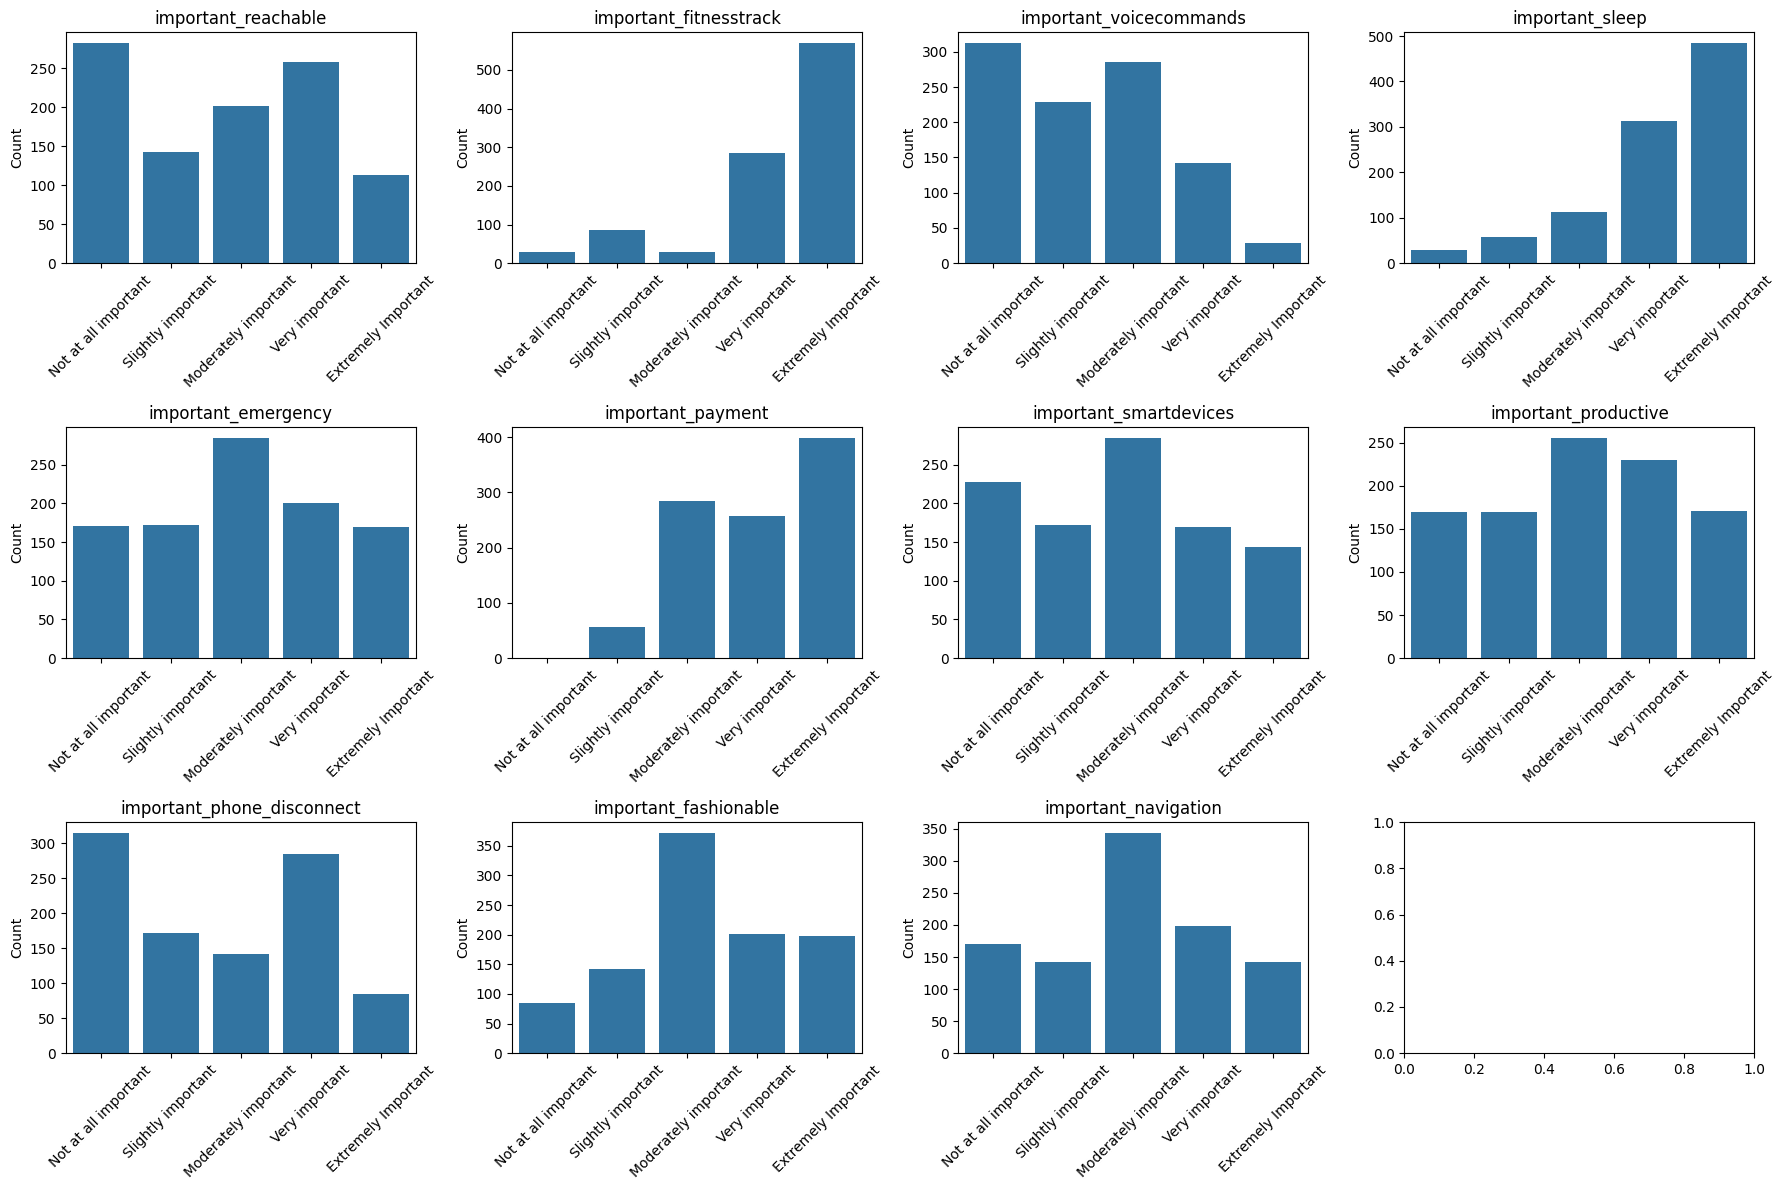

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns to plot
important_features = [
    'important_reachable', 'important_fitnesstrack', 'important_voicecommands',
    'important_sleep', 'important_emergency', 'important_payment',
    'important_smartdevices', 'important_productive', 'important_phone_disconnect',
    'important_fashionable', 'important_navigation'
]

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot count plots for each important feature
for i, feature in enumerate(important_features):
    sns.countplot(data=new_df, x=feature, order=['Not at all important', 'Slightly important', 'Moderately important', 'Very important', 'Extremely Important'], ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

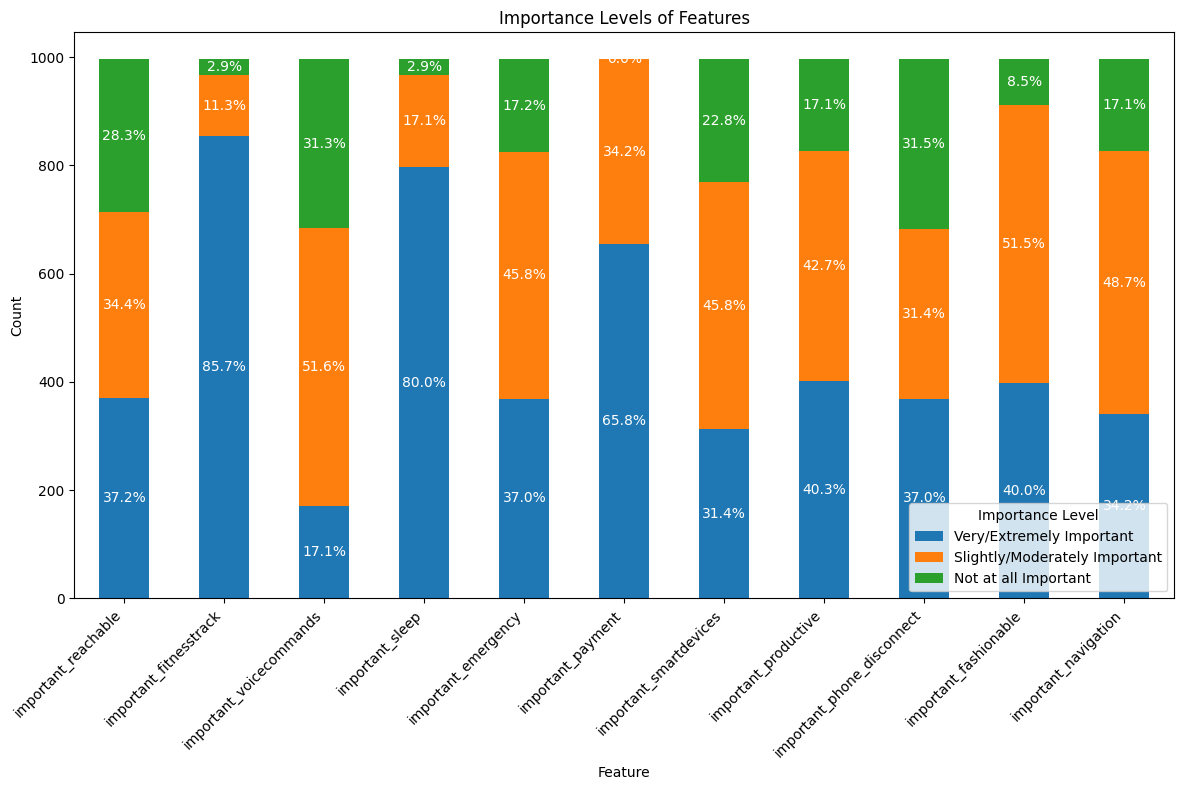

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns to plot
important_features = [
    'important_reachable', 'important_fitnesstrack', 'important_voicecommands',
    'important_sleep', 'important_emergency', 'important_payment',
    'important_smartdevices', 'important_productive', 'important_phone_disconnect',
    'important_fashionable', 'important_navigation'
]

# Calculate the count for each importance level for each feature
counts_by_level = {}
for feature in important_features:
    counts_by_level[feature] = new_df[feature].value_counts()

# Extract counts for each importance level
very_extremely_important = pd.Series({k: v.get('Very important', 0) + v.get('Extremely Important', 0) for k, v in counts_by_level.items()})
slightly_moderately_important = pd.Series({k: v.get('Slightly important', 0) + v.get('Moderately important', 0) for k, v in counts_by_level.items()})
not_at_all_important = pd.Series({k: v.get('Not at all important', 0) for k, v in counts_by_level.items()})

# Calculate total counts for each feature
total_counts = very_extremely_important + slightly_moderately_important + not_at_all_important

# Combine counts for plotting
plot_data = pd.DataFrame({
    'Very/Extremely Important': very_extremely_important,
    'Slightly/Moderately Important': slightly_moderately_important,
    'Not at all Important': not_at_all_important
})

# Plot the data
plt.figure(figsize=(12, 8))
plot_data.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Importance Levels of Features')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Importance Level')

# Annotate bars with percentages
for i in range(len(plot_data)):
    total_count = total_counts[i]
    bottom = 0
    for j in range(3):
        count = plot_data.iloc[i, j]
        percentage = count / total_count * 100 if total_count != 0 else 0
        plt.text(i, bottom + count / 2, f'{percentage:.1f}%', ha='center', va='center', color='white')
        bottom += count

plt.tight_layout()
plt.show()


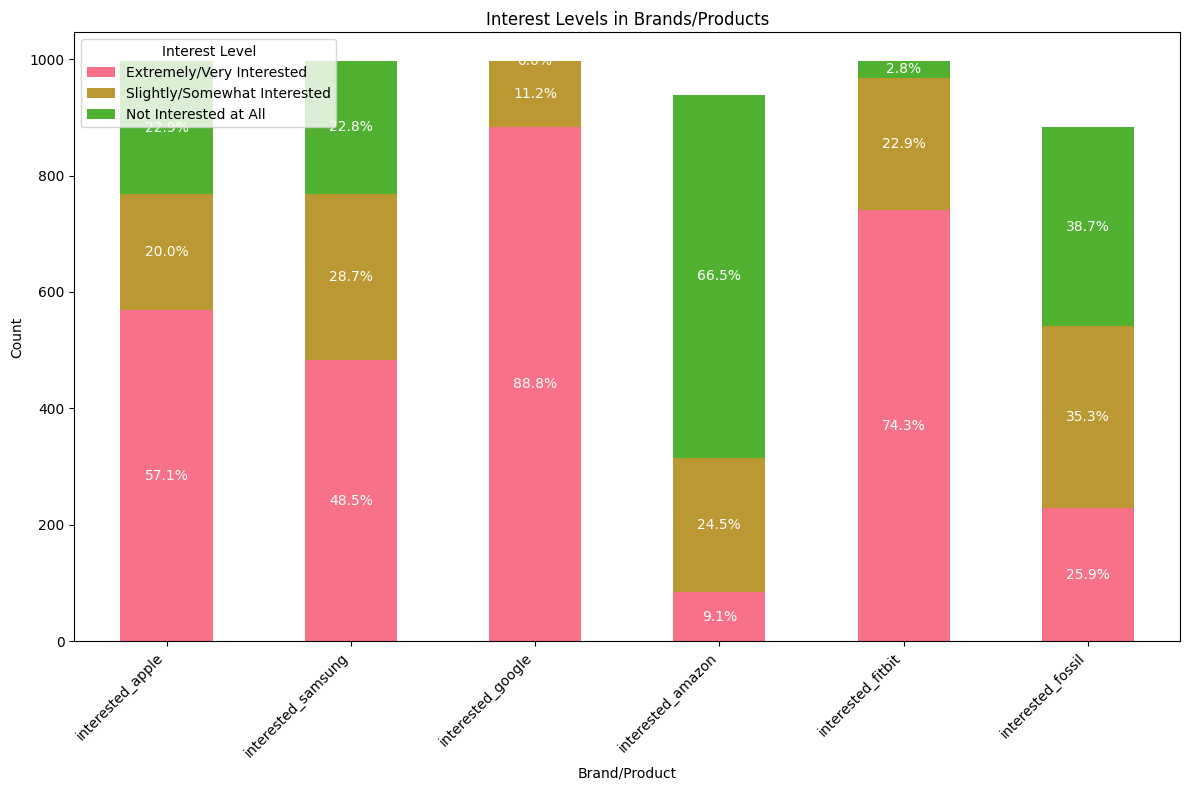

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns to plot
interest_columns = [
    'interested_apple', 'interested_samsung', 'interested_google',
    'interested_amazon', 'interested_fitbit', 'interested_fossil'
]

# Calculate the count for each interest level for each brand/product
counts_by_level = {}
for column in interest_columns:
    counts_by_level[column] = new_df[column].value_counts()

# Extract counts for each interest level
extremely_very_interest = pd.Series({k: v.get('Extremely interested', 0) + v.get('Very interested', 0) for k, v in counts_by_level.items()})
slightly_somewhat_interest = pd.Series({k: v.get('Slightly interested', 0) + v.get('Somewhat interested', 0) for k, v in counts_by_level.items()})
not_interested = pd.Series({k: v.get('Not interested at all', 0) for k, v in counts_by_level.items()})

# Calculate total counts for each brand/product
total_counts = extremely_very_interest + slightly_somewhat_interest + not_interested

# Combine counts for plotting
plot_data = pd.DataFrame({
    'Extremely/Very Interested': extremely_very_interest,
    'Slightly/Somewhat Interested': slightly_somewhat_interest,
    'Not Interested at All': not_interested
})

# Define color palette
colors = sns.color_palette('husl')

# Plot the data
plt.figure(figsize=(12, 8))
plot_data.plot(kind='bar', stacked=True, ax=plt.gca(), color=colors)
plt.title('Interest Levels in Brands/Products')
plt.xlabel('Brand/Product')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Interest Level')

# Annotate bars with percentages
for i in range(len(plot_data)):
    total_count = total_counts[i]
    bottom = 0
    for j in range(3):
        count = plot_data.iloc[i, j]
        percentage = count / total_count * 100 if total_count != 0 else 0
        plt.text(i, bottom + count / 2, f'{percentage:.1f}%', ha='center', va='center', color='white')
        bottom += count

plt.tight_layout()
plt.show()


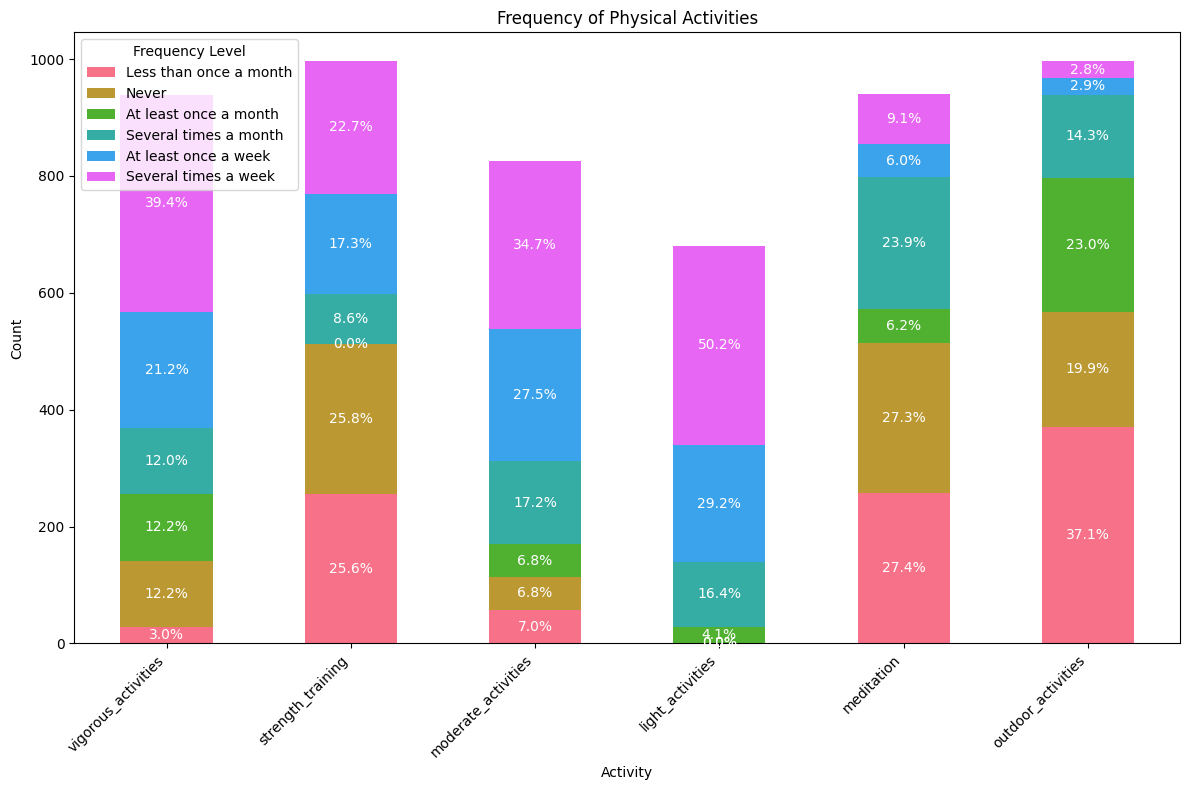

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns to plot
activity_columns = [
    'vigorous_activities', 'strength_training', 'moderate_activities',
    'light_activities', 'meditation', 'outdoor_activities'
]

# Calculate the count for each frequency level for each activity
counts_by_level = {}
for column in activity_columns:
    counts_by_level[column] = new_df[column].value_counts()

# Extract counts for each frequency level
less_than_once_month = pd.Series({k: v.get('Less often than once a month', 0) for k, v in counts_by_level.items()})
never = pd.Series({k: v.get('Never', 0) for k, v in counts_by_level.items()})
at_least_once_month = pd.Series({k: v.get('At least once a month', 0) for k, v in counts_by_level.items()})
several_times_month = pd.Series({k: v.get('Several times a month', 0) for k, v in counts_by_level.items()})
at_least_once_week = pd.Series({k: v.get('At least once a week', 0) for k, v in counts_by_level.items()})
several_times_week = pd.Series({k: v.get('Several times a week', 0) for k, v in counts_by_level.items()})

# Calculate total counts for each activity
total_counts = less_than_once_month + never + at_least_once_month + several_times_month + at_least_once_week + several_times_week

# Combine counts for plotting
plot_data = pd.DataFrame({
    'Less than once a month': less_than_once_month,
    'Never': never,
    'At least once a month': at_least_once_month,
    'Several times a month': several_times_month,
    'At least once a week': at_least_once_week,
    'Several times a week': several_times_week
})

# Define color palette
colors = sns.color_palette('husl', n_colors=6)

# Plot the data
plt.figure(figsize=(12, 8))
plot_data.plot(kind='bar', stacked=True, ax=plt.gca(), color=colors)
plt.title('Frequency of Physical Activities')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Frequency Level')

# Annotate bars with percentages
for i in range(len(plot_data)):
    total_count = total_counts[i]
    bottom = 0
    for j in range(6):
        count = plot_data.iloc[i, j]
        percentage = count / total_count * 100 if total_count != 0 else 0
        plt.text(i, bottom + count / 2, f'{percentage:.1f}%', ha='center', va='center', color='white')
        bottom += count

plt.tight_layout()
plt.show()


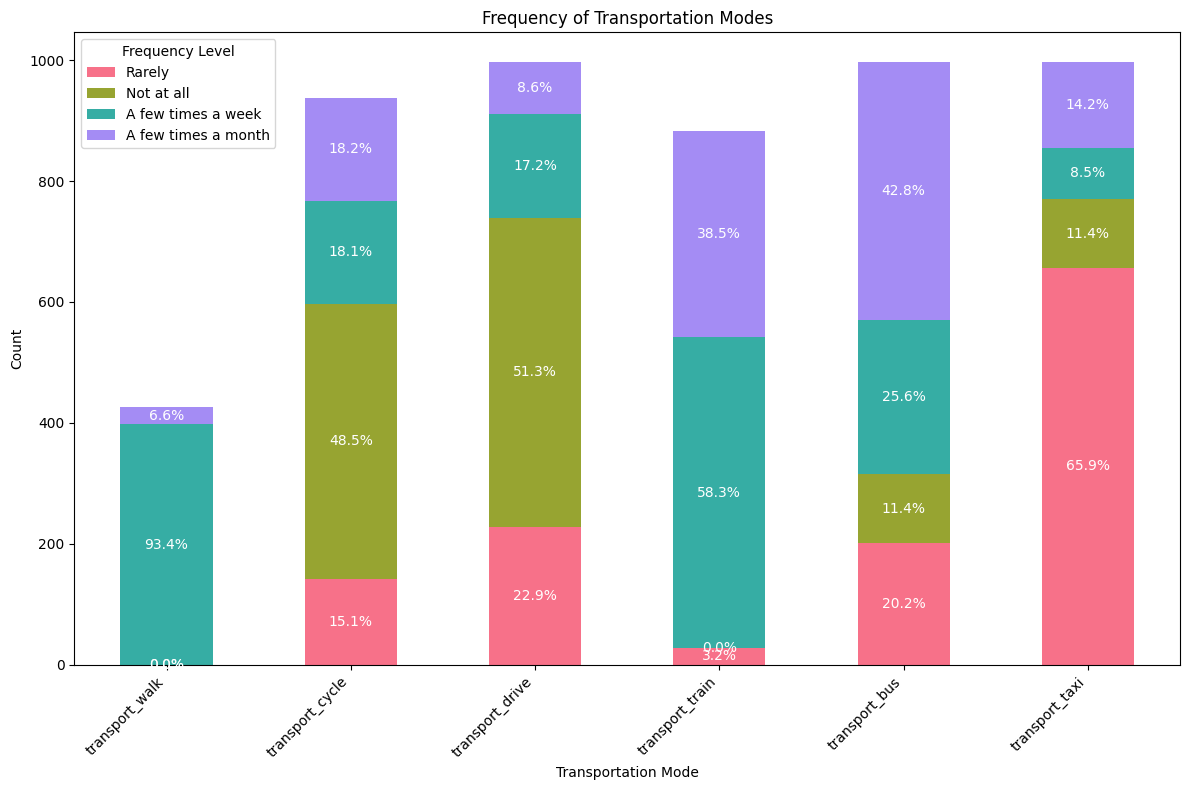

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns to plot
transport_columns = [
    'transport_walk', 'transport_cycle', 'transport_drive',
    'transport_train', 'transport_bus', 'transport_taxi'
]

# Calculate the count for each frequency level for each transportation mode
counts_by_level = {}
for column in transport_columns:
    counts_by_level[column] = new_df[column].value_counts()

# Extract counts for each frequency level
rarely = pd.Series({k: v.get('Rarely', 0) for k, v in counts_by_level.items()})
not_at_all = pd.Series({k: v.get('Not at all', 0) for k, v in counts_by_level.items()})
few_times_week = pd.Series({k: v.get('A few times a week', 0) for k, v in counts_by_level.items()})
few_times_month = pd.Series({k: v.get('A few times a month', 0) for k, v in counts_by_level.items()})

# Calculate total counts for each transportation mode
total_counts = rarely + not_at_all + few_times_week + few_times_month

# Combine counts for plotting
plot_data = pd.DataFrame({
    'Rarely': rarely,
    'Not at all': not_at_all,
    'A few times a week': few_times_week,
    'A few times a month': few_times_month
})

# Define color palette
colors = sns.color_palette('husl', n_colors=4)

# Plot the data
plt.figure(figsize=(12, 8))
plot_data.plot(kind='bar', stacked=True, ax=plt.gca(), color=colors)
plt.title('Frequency of Transportation Modes')
plt.xlabel('Transportation Mode')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Frequency Level')

# Annotate bars with percentages
for i in range(len(plot_data)):
    total_count = total_counts[i]
    bottom = 0
    for j in range(4):
        count = plot_data.iloc[i, j]
        percentage = count / total_count * 100 if total_count != 0 else 0
        plt.text(i, bottom + count / 2, f'{percentage:.1f}%', ha='center', va='center', color='white')
        bottom += count

plt.tight_layout()
plt.show()


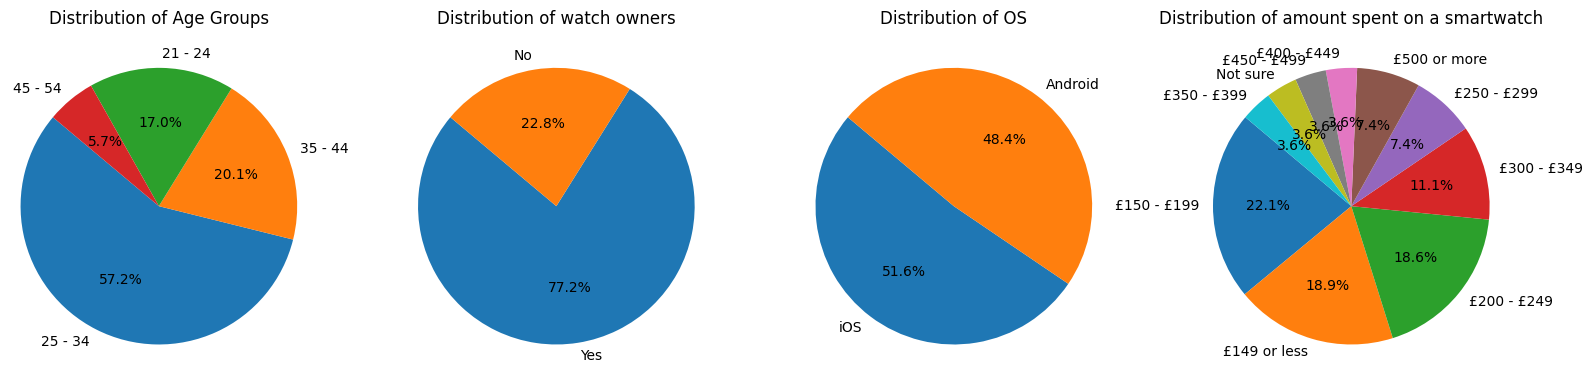

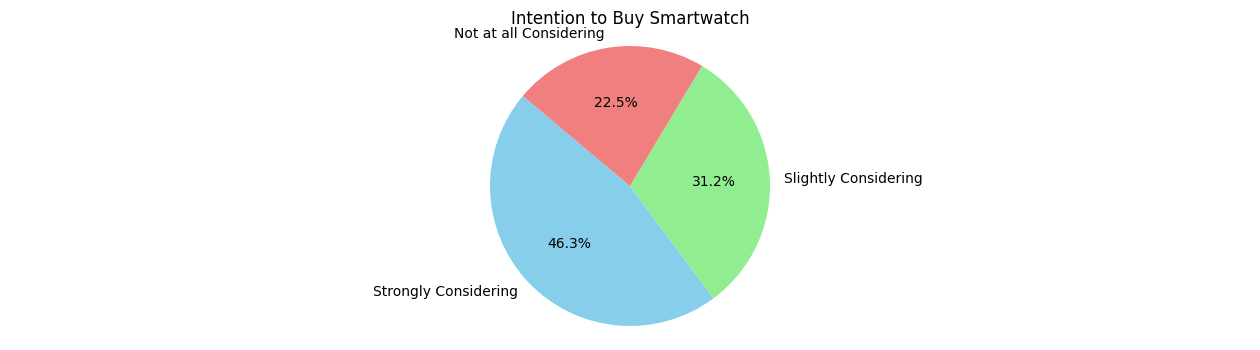

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot pie chart
def plot_pie_chart(ax, data, title):
    # Calculate the count of each category
    counts = data.value_counts()

    # Plot the pie chart
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(title)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Plot pie charts for each categorical variable
plot_pie_chart(axes[0], df['age'], 'Distribution of Age Groups')
plot_pie_chart(axes[1], df['watch_owner'], 'Distribution of watch owners')
plot_pie_chart(axes[2], df['OS_pair'], 'Distribution of OS')
plot_pie_chart(axes[3], df['spent_watch'], 'Distribution of amount spent on a smartwatch')

# Adjust layout
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt

# Calculate counts for each category
counts =new_df['intention_buy'].value_counts()

# Create a pie chart
plt.figure(figsize=(16, 4))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Intention to Buy Smartwatch')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()



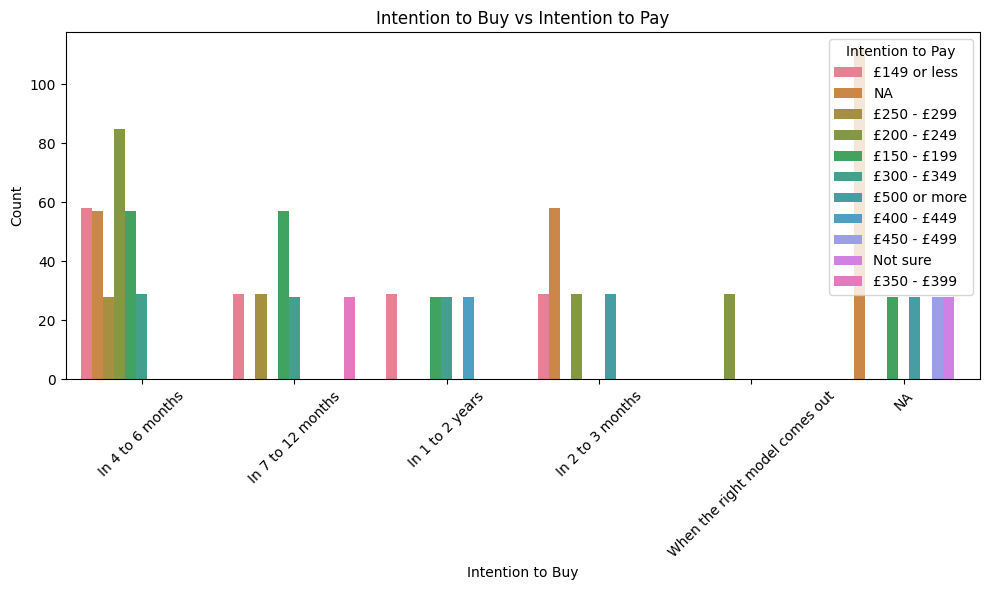

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='intention_when', hue='intention_price')
plt.title('Intention to Buy vs Intention to Pay')
plt.xlabel('Intention to Buy')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Intention to Pay')
plt.tight_layout()
plt.show()



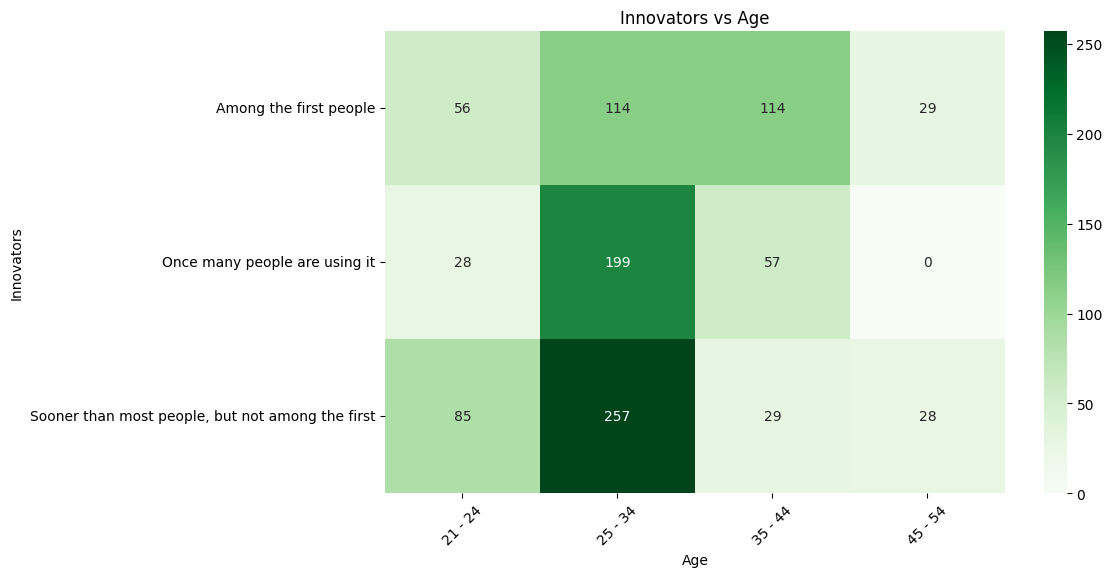

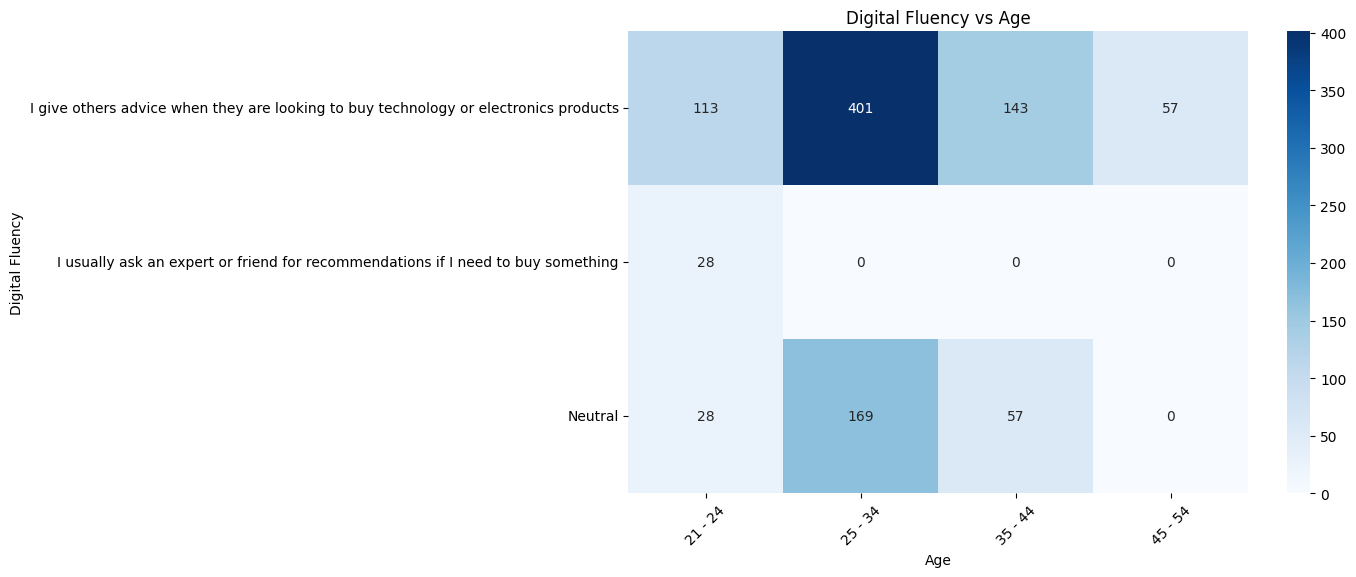

In [ ]:
# Create a cross-tabulation of innovators and age
cross_tab = pd.crosstab(new_df['innovators'], new_df['age'])

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Greens', fmt='d')
plt.title('Innovators vs Age')
plt.xlabel('Age')
plt.ylabel('Innovators')
plt.xticks(rotation=45)
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Create a cross-tabulation of digital_fluency and age
cross_tab = pd.crosstab(new_df['digital_fluency'], new_df['age'])

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title('Digital Fluency vs Age')
plt.xlabel('Age')
plt.ylabel('Digital Fluency')
plt.xticks(rotation=45)
plt.show()


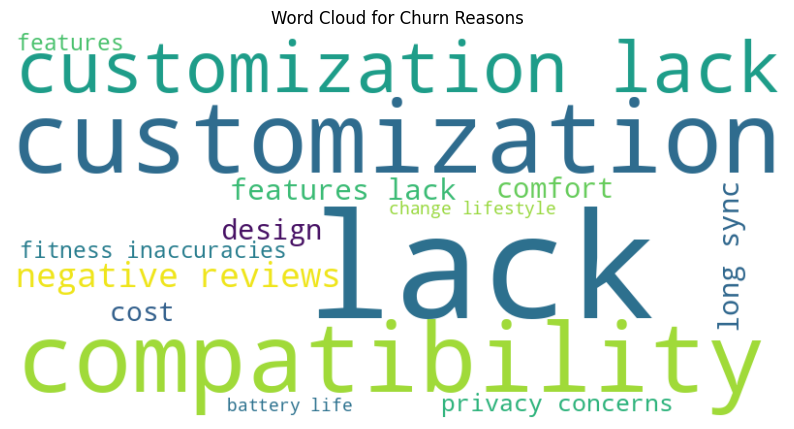

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all churn reasons into a single string
churn_reasons_text = ' '.join(new_df['churn_reasons'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(churn_reasons_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Churn Reasons')
plt.axis('off')
plt.show()


# Data Transformation

In [ ]:
# Define mapping for ordinal categorical variables to numerical values
ordinal_mapping = {
    'watch_satisfaction': {
        'Not at all satisfied': 1,
        'Somewhat dissatisfied': 2,
        'Neither satisfied nor dissatisfied': 3,
        'Somewhat satisfied': 4,
        'Very satisfied': 5,
'NA':6

    },
    'frequency_wear': {
        'Not wearing it anymore': 1,
        'A few times a month': 2,
        'A few times a week': 3,
        'Daily': 4,
'NA':5

    },
    'intention_buy': {
        'Not at all Considering': 1,
        'Slightly Considering': 2,
        'Strongly Considering': 3,

'NA':4

    },
    'important_reachable': {
        'Not at all important': 1,
        'Slightly important': 2,
        'Moderately important': 3,
        'Very important': 4,
        'Extremely Important': 5,

'NA':6

    },
    'important_fitnesstrack': {
        'Not at all important': 1,
        'Slightly important': 2,
        'Moderately important': 3,
        'Very important': 4,
        'Extremely Important': 5,

'NA':6

    },
    'important_voicecommands': {
        'Not at all important': 1,
        'Slightly important': 2,
        'Moderately important': 3,
        'Very important': 4,
        'Extremely Important': 5,

'NA':6

    },
    'important_sleep': {
        'Not at all important': 1,
        'Slightly important': 2,
        'Moderately important': 3,
        'Very important': 4,
        'Extremely Important': 5,

'NA':6

    },
    'important_emergency': {
        'Not at all important': 1,
        'Slightly important': 2,
        'Moderately important': 3,
        'Very important': 4,
        'Extremely Important': 5,

'NA':6

    },
    'important_payment': {
        'Not at all important': 1,
        'Slightly important': 2,
        'Moderately important': 3,
        'Very important': 4,
        'Extremely Important': 5,

'NA':6

    },
    'important_smartdevices': {
        'Not at all important': 1,
        'Slightly important': 2,
        'Moderately important': 3,
        'Very important': 4,
        'Extremely Important': 5,

'NA':6

    },
    'important_productive': {
        'Not at all important': 1,
        'Slightly important': 2,
        'Moderately important': 3,
        'Very important': 4,
        'Extremely Important': 5,

'NA':6    },
    'important_phone_disconnect': {
        'Not at all important': 1,
        'Slightly important': 2,
        'Moderately important': 3,
        'Very important': 4,
        'Extremely Important': 5,

'NA':6

    },
    'important_fashionable': {
        'Not at all important': 1,
        'Slightly important': 2,
        'Moderately important': 3,
        'Very important': 4,
        'Extremely Important': 5,

'NA':6

    },
    'important_navigation': {
        'Not at all important': 1,
        'Slightly important': 2,
        'Moderately important': 3,
        'Very important': 4,
        'Extremely Important': 5,

'NA':6

    },
    'interested_apple': {
        'Not interested at all': 1,
        'Slightly interested': 2,
        'Somewhat interested': 3,
        'Very interested': 4,
        'Extremely interested': 5,

'NA':6

    },
    'interested_samsung': {
        'Not interested at all': 1,
        'Slightly interested': 2,
        'Somewhat interested': 3,
        'Very interested': 4,
        'Extremely interested': 5,

'NA':6

    },
    'interested_google': {
        'Not interested at all': 1,
        'Slightly interested': 2,
        'Somewhat interested': 3,
        'Very interested': 4,
        'Extremely interested': 5,

'NA':6

    },
    'interested_amazon': {
        'Not interested at all': 1,
        'Slightly interested': 2,
        'Somewhat interested': 3,
        'Very interested': 4,
        'Extremely interested': 5,
        "Don't know": 6,

'NA':7

    },
    'interested_fitbit': {
        'Not interested at all': 1,
        'Slightly interested': 2,
        'Somewhat interested': 3,
        'Very interested': 4,
        'Extremely interested': 5,

'NA':6

    },
    'interested_fossil': {
        'Not interested at all': 1,
        'Slightly interested': 2,
        'Somewhat interested': 3,
        'Very interested': 4,
        'Extremely interested': 5,
        "Don't know": 6,


'NA':7    },
    'vigorous_activities': {
        'Never': 1,
        'Less often than once a month': 2,
        'At least once a month': 3,
        'Several times a month': 4,
        'At least once a week': 5,
        'Several times a week': 6,
        'Daily': 7,

'NA':8

    },
    'strength_training': {
        'Never': 1,
        'Less often than once a month': 2,
        'At least once a month': 3,
        'Several times a month': 4,
        'At least once a week': 5,
        'Several times a week': 6,
        'Daily': 7,

'NA':8    },
    'moderate_activities': {
        'Never': 1,
        'Less often than once a month': 2,
        'At least once a month': 3,
        'Several times a month': 4,
        'At least once a week': 5,
        'Several times a week': 6,
        'Daily': 7,


'NA':8

    },
    'light_activities': {
        'Never': 1,
        'Less often than once a month': 2,
        'At least once a month': 3,
        'Several times a month': 4,
        'At least once a week': 5,
        'Several times a week': 6,
        'Daily': 7,


'NA':8

    },
    'meditation': {
        'Never': 1,
        'Less often than once a month': 2,
        'At least once a month': 3,
        'Several times a month': 4,
        'At least once a week': 5,
        'Several times a week': 6,
        'Daily': 7,


'NA':8

    },
    'outdoor_activities': {
        'Never': 1,
        'Less often than once a month': 2,
        'At least once a month': 3,
        'Several times a month': 4,
        'At least once a week': 5,
        'Several times a week': 6,
        'Daily': 7,

'NA':8

    },
    'goal_active_lifestyle': {
        'Strongly disagree': 1,
        'Somewhat disagree': 2,
        'Neutral': 3,
        'Somewhat agree': 4,
        'Strongly agree': 5,

 'NA':6

    },
    'goal_optimize_fitness': {
        'Strongly disagree': 1,
        'Somewhat disagree': 2,
        'Neutral': 3,
        'Somewhat agree': 4,
        'Strongly agree': 5,


'NA':6    },
    'goal_mindfulness': {
        'Strongly disagree': 1,
        'Somewhat disagree': 2,
        'Neutral': 3,
        'Somewhat agree': 4,
        'Strongly agree': 5,

'NA':6

    },
    'goal_health': {
        'Strongly disagree': 1,
        'Somewhat disagree': 2,
        'Neutral': 3,
        'Somewhat agree': 4,
        'Strongly agree': 5,

'NA':6


    },
    'transport_walk': {
        'Not at all': 1,
        'A few times a month': 2,
        'Rarely': 3,
        'A few times a week': 4,
        'Everyday': 5,


'NA':6    },
    'transport_cycle': {
        'Not at all': 1,
        'A few times a month': 2,
        'Rarely': 3,
        'A few times a week': 4,
        'Everyday': 5,

'NA':6

    },
    'transport_drive': {
        'Not at all': 1,
        'A few times a month': 2,
        'Rarely': 3,
        'A few times a week': 4,
        'Everyday': 5,

'NA':6

    },
    'transport_train': {
        'Not at all': 1,
        'A few times a month': 2,
        'Rarely': 3,
        'A few times a week': 4,
        'Everyday': 5,

'NA':6

    },
    'transport_bus': {
        'Not at all': 1,
        'A few times a month': 2,
        'Rarely': 3,
        'A few times a week': 4,
        'Everyday': 5,


'NA':6

    },
    'transport_taxi': {
        'Not at all': 1,
        'A few times a month': 2,
        'Rarely': 3,
        'A few times a week': 4,
        'Everyday': 5,

'NA':6

    },
        'phone_navigate': {
        'Not at all': 1,
        'A few times a month': 2,
        'Rarely': 3,
        'A few times a week': 4,
        'Everyday': 5,


'NA':6    },
'spent_watch': {
        '£149 or less': 1,
        '£150 - £199': 2,
        '£200 - £249': 3,
        '£250 - £299': 4,
        '£300 - £349': 5,
        '£350 - £399': 6,
        '£400 - £449': 7,
        '£450 - £499': 8,
        '£500 or more': 9,
        'Not sure': 10,
        'NA':11

        },
    'intention_price': {
        '£149 or less': 1,
        '£150 - £199': 2,
        '£200 - £249': 3,
        '£250 - £299': 4,
        '£300 - £349': 5,
        '£350 - £399': 6,
        '£400 - £449': 7,
        '£450 - £499': 8,
        '£500 or more': 9,
        'Not sure': 10,
        'NA':11

    },
    'intention_when': {
        'In 2 to 3 months': 1,
        'In 4 to 6 months': 2,
        'In 7 to 12 months': 3,
        'In 1 to 2 years': 4,
        'When the right model comes out': 5,


'NA':6

    },

        'digital_fluency': {
        'I give others advice when they are looking to buy technology or electronics products': 1,
        'Neutral': 2,
        'I usually ask an expert or friend for recommendations if I need to buy something': 3,


'NA':4    },
    'innovators': {
        'Among the first people': 1,
        'Once many people are using it': 2,
        'Sooner than most people, but not among the first': 3,


'NA':4

    },
    'age': {
        '21 - 24': 1,
        '25 - 34': 2,
        '35 - 44': 3,
        '45 - 54': 4,


'NA':5},

    'situation': {
        'Living with significant other': 1,
        'Living with children': 2,
        'Living alone but in a relationship': 3,
        'Living alone': 4,
        'Living with house mates': 5,


'NA':6

    },
    'churn_reasons': {
        'lack of customization': 1,
        'comfort and design': 2,
        'negative reviews': 3,
        'lack of features': 4,
        'long sync': 5,
        'compatibility': 6,
        'change lifestyle': 7,
        'cost': 8,
        'battery life': 9,
        'privacy concerns': 10,
        'fitness inaccuracies': 11,


'NA':7

    },
    'OS_pair': {
        'iOS': 1,
        'Android': 2,

'NA':3

    },
    'purchase_year': {
        2020.0: 1,
        2021.0: 2,
        2019.0: 3,
        2018.0: 4,
        2017.0: 5,

'NA':6

    },
    'watch_brand': {
        'Sense': 1,
        'Fitbit': 2,
        'Mi': 3,
        'Apple': 4,
        'Ticwatch': 5,
        'Forerunner': 6,
        'Withings': 7,
        'Vivoactive': 8,
        'Garmin': 9,
        'Sport': 10,
        'Fossil': 11,
        'Samsung': 12,
        'Versa': 13,
        'Suunto': 14,


'NA':15

    },
    'watch_owner': {
        'Yes': 1,
        'No': 0

    },
    'phone_brand': {
        'Apple iPhone': 1,
        'Google Pixel': 2,
        'Samsung Galaxy': 3,


'NA':4

    }



  }

# Apply mapping to convert ordinal categorical variables to numerical values
for col, mapping in ordinal_mapping.items():
    new_df[col] = new_df[col].map(mapping)

# Display the updated DataFrame
print(new_df.head())

   age  phone_brand  watch_owner  watch_brand  purchase_year  spent_watch  \
0    3            1            1            1              1            1   
1    3            2            1            2              2            1   
2    2            1            1            3              3            1   
3    2            2            0           15              6           11   
4    2            1            1            2              3            1   

   OS_pair  watch_satisfaction  frequency_wear  churn_reasons  ...  \
0        1                   4               4              1  ...   
1        2                   4               4              2  ...   
2        1                   4               4              3  ...   
3        3                   6               5              4  ...   
4        2                   3               4              1  ...   

   goal_mindfulness  goal_health  transport_walk  transport_cycle  \
0                 3            2               

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   age                         996 non-null    int64
 1   phone_brand                 996 non-null    int64
 2   watch_owner                 996 non-null    int64
 3   watch_brand                 996 non-null    int64
 4   purchase_year               996 non-null    int64
 5   spent_watch                 996 non-null    int64
 6   OS_pair                     996 non-null    int64
 7   watch_satisfaction          996 non-null    int64
 8   frequency_wear              996 non-null    int64
 9   churn_reasons               996 non-null    int64
 10  intention_buy               996 non-null    int64
 11  intention_when              996 non-null    int64
 12  intention_price             996 non-null    int64
 13  important_reachable         996 non-null    int64
 14  important_

In [ ]:
new_df.reset_index(drop=True, inplace=True)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   age                         996 non-null    int64
 1   phone_brand                 996 non-null    int64
 2   watch_owner                 996 non-null    int64
 3   watch_brand                 996 non-null    int64
 4   purchase_year               996 non-null    int64
 5   spent_watch                 996 non-null    int64
 6   OS_pair                     996 non-null    int64
 7   watch_satisfaction          996 non-null    int64
 8   frequency_wear              996 non-null    int64
 9   churn_reasons               996 non-null    int64
 10  intention_buy               996 non-null    int64
 11  intention_when              996 non-null    int64
 12  intention_price             996 non-null    int64
 13  important_reachable         996 non-null    int64
 14  important_

In [ ]:
new_df.to_csv('df_num.csv', index=False)

# Clustering

In [ ]:
# with scaling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 2: 3 iterations to converge


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 3: 4 iterations to converge
Iteration 4: 3 iterations to converge


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 5: 4 iterations to converge


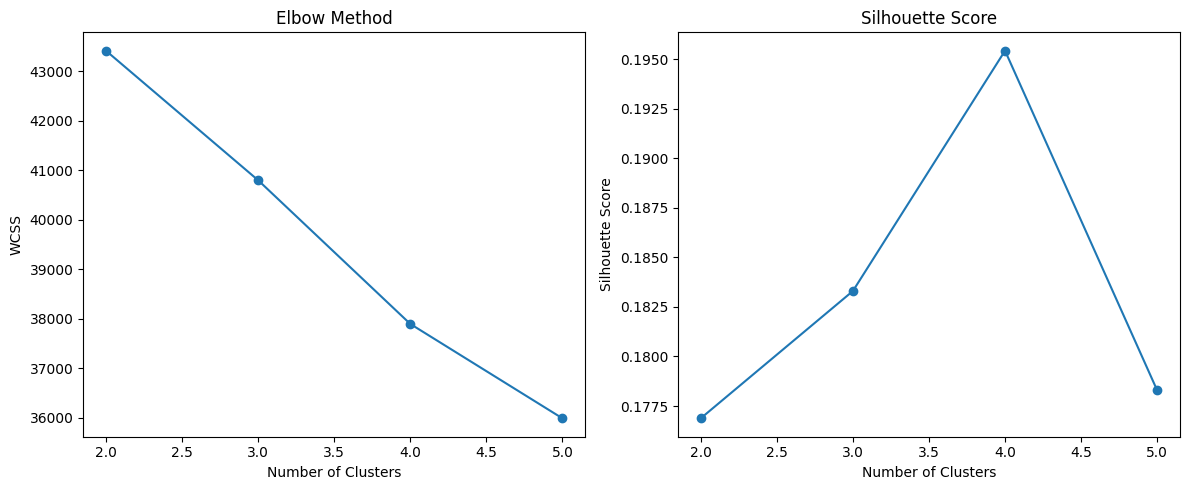

Optimal number of clusters: 4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,age,phone_brand,watch_owner,watch_brand,purchase_year,spent_watch,OS_pair,watch_satisfaction,frequency_wear,churn_reasons,...,goal_mindfulness,goal_health,transport_walk,transport_cycle,transport_drive,transport_train,transport_bus,transport_taxi,phone_navigate,situation
0,25 - 34,Apple iPhone,Yes,Versa,2020.0,£150 - £199,iOS,Somewhat dissatisfied,Not wearing it anymore,negative reviews,...,Neutral,Neutral,A few times a week,Not at all,Not at all,A few times a month,A few times a month,A few times a month,Not at all,Living with house mates
1,25 - 34,Google Pixel,No,NA,NA,NA,NA,NA,NA,long sync,...,Neutral,Neutral,A few times a week,Not at all,Not at all,A few times a week,Rarely,Rarely,Rarely,Living alone but in a relationship
2,35 - 44,Google Pixel,Yes,Vivoactive,2021.0,£250 - £299,Android,Somewhat satisfied,A few times a week,compatibility,...,Somewhat disagree,Neutral,Everyday,A few times a month,A few times a month,A few times a week,A few times a month,A few times a month,Rarely,Living with significant other
3,25 - 34,Google Pixel,Yes,Ticwatch,2021.0,£250 - £299,iOS,Somewhat satisfied,Daily,lack of features,...,Somewhat agree,Neutral,A few times a week,Rarely,A few times a month,Rarely,Rarely,Rarely,Rarely,Living with children


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Set random seed for reproducibility
np.random.seed(1224)

# Read the data
new_df = pd.read_csv("df_num.csv", index_col=None)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df)  # Fit and transform the data

# Perform KMeans clustering with different values of k
wcss = []
silhouette_scores = []
max_clusters = 5  # Maximum number of clusters to try
for i in range(2, max_clusters + 1):  # Start from 2 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)  # Use scaled data for clustering
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))
    print(f"Iteration {i}: {kmeans.n_iter_} iterations to converge")

# Plot the elbow curve and silhouette scores
plt.figure(figsize=(12, 5))

# Elbow curve
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choose the number of clusters based on silhouette score or another criterion
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 as we started from 2 clusters
print(f"Optimal number of clusters: {optimal_num_clusters}")

# Perform KMeans clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=42)
kmeans.fit(scaled_data)  # Use scaled data for clustering

# Add cluster labels to the original DataFrame
new_df['clusters'] = kmeans.labels_

# Save the DataFrame with cluster labels
new_df.to_csv('clustered_data.csv', index=False)

# Generate final clusters CSV
customer_kmeans_grp = new_df.groupby('clusters').mean().round(3)


# Save the DataFrame with cluster labels
new_df.to_csv('clustered_data.csv', index=False)

# Generate final clusters CSV
customer_kmeans_grp = new_df.groupby('clusters').mean().round(3)

def map_to_categorical(row):
    categorical_row = []
    for val, col_name in zip(row, customer_kmeans_grp.columns):
        if col_name in ordinal_mapping:
            mapping = ordinal_mapping[col_name]
            # Round numerical values to the nearest integer
            if isinstance(val, float):
                val = round(val)
            categorical_val = [key for key, value in mapping.items() if value == val]
            if categorical_val:
                categorical_row.append(categorical_val[0])
            else:
                categorical_row.append(val)  # Keep the original numerical value if no categorical value is found
        else:
            categorical_row.append(val)  # For non-ordinal columns, keep the original value
    return categorical_row

customer_kmeans_grp_categorical = customer_kmeans_grp.apply(map_to_categorical, axis=1)

customer_kmeans_grp_categorical.to_csv('customer_segments.csv', index=True)

import pandas as pd

# Read the CSV file containing customer segments
df_concatenated = pd.read_csv('customer_segments.csv')

def process_values(row):
    return [value.strip(" '[]") for value in row.split(',')]

# Apply process_values function to each row in df_concatenated
df_processed = df_concatenated.apply(lambda row: pd.Series(process_values(row['0'])), axis=1)

# Check if the number of columns matches
if len(df_processed.columns) < len(customer_kmeans_grp.columns):
    diff = len(customer_kmeans_grp.columns) - len(df_processed.columns)
    # Add missing columns to df_processed
    for i in range(diff):
        df_processed[f'column_{i}'] = np.nan
elif len(df_processed.columns) > len(customer_kmeans_grp.columns):
    # Drop extra columns from df_processed
    df_processed = df_processed.iloc[:, :len(customer_kmeans_grp.columns)]

# Adjust the number of columns in df_processed to match customer_kmeans_grp
df_processed.columns = customer_kmeans_grp.columns

# Save the final DataFrame to a CSV file without index
df_processed.to_csv('final_clusters.csv', index=False)

df_processed.head()

In [ ]:

# Generate final clusters CSV
customer_kmeans_grp = new_df.groupby('clusters').mean().round(3)

# Analyze features contributing most to the cluster
cluster_means = customer_kmeans_grp.copy()
overall_means = new_df.drop(columns=['clusters']).mean()
mean_diff = cluster_means - overall_means
mean_diff_sorted = mean_diff.abs().mean(axis=0).sort_values(ascending=False)
print("Features contributing most to the cluster:")
print(mean_diff_sorted)


Features contributing most to the cluster:
watch_brand                   3.615750
intention_price               3.065184
spent_watch                   3.065184
purchase_year                 1.671944
outdoor_activities            1.236500
watch_satisfaction            1.203406
frequency_wear                1.195711
goal_optimize_fitness         1.151750
churn_reasons                 1.115750
situation                     1.087750
strength_training             0.947250
important_emergency           0.943750
important_fashionable         0.914000
intention_when                0.912250
important_productive          0.887500
meditation                    0.838406
important_reachable           0.801554
vigorous_activities           0.793000
goal_active_lifestyle         0.788250
important_phone_disconnect    0.745500
phone_navigate                0.732250
important_voicecommands       0.693685
interested_fitbit             0.682669
transport_cycle               0.636904
interested_fossil    

In [ ]:
new_df.describe()

,age,phone_brand,watch_owner,watch_brand,purchase_year,spent_watch,OS_pair,watch_satisfaction,frequency_wear,churn_reasons,...,goal_health,transport_walk,transport_cycle,transport_drive,transport_train,transport_bus,transport_taxi,phone_navigate,situation,clusters
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,...,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,2.145582,1.684739,0.772088,8.373494,2.971888,5.466867,1.829317,4.452811,3.855422,4.528112,...,3.084337,4.516064,2.201807,2.059237,3.403614,2.599398,2.714859,3.113454,2.508032,2.258032
std,0.760779,0.705334,0.419696,5.006233,1.947350,3.809260,0.773288,1.178868,1.019006,3.162947,...,0.968299,0.647176,1.329388,1.194420,1.074018,0.990994,0.777200,1.389906,1.537124,0.903753
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,4.000000,1.000000,2.000000,1.000000,4.000000,4.000000,1.000000,...,2.000000,4.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,8.000000,2.000000,4.000000,2.000000,4.000000,4.000000,4.000000,...,3.000000,5.000000,2.000000,1.000000,4.000000,2.000000,3.000000,4.000000,2.000000,3.000000
75%,3.000000,2.000000,1.000000,15.000000,5.000000,10.000000,2.000000,5.000000,4.000000,6.000000,...,4.000000,5.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000
max,4.000000,3.000000,1.000000,15.000000,6.000000,11.000000,3.000000,6.000000,5.000000,11.000000,...,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,3.000000


In [ ]:
import pandas as pd

# Read the clustered data
clustered_data = pd.read_csv('clustered_data.csv')

# Group data by clusters
cluster_groups = clustered_data.groupby('clusters')

# Define the categorical columns
categorical_columns = ['watch_owner', 'watch_brand', 'OS_pair', 'situation']

# Loop through each cluster
for cluster, group in cluster_groups:
    print(f"Cluster {cluster}:")
    # Count the frequency of each category in each column
    dominant_categories = {}
    for column in categorical_columns:
        category_counts = group[column].value_counts()
        dominant_category = category_counts.idxmax()
        dominant_categories[column] = dominant_category
    print(dominant_categories)


Cluster 0:
{'watch_owner': 1, 'watch_brand': 13, 'OS_pair': 1, 'situation': 5}
Cluster 1:
{'watch_owner': 0, 'watch_brand': 15, 'OS_pair': 3, 'situation': 4}
Cluster 2:
{'watch_owner': 1, 'watch_brand': 2, 'OS_pair': 2, 'situation': 1}
Cluster 3:
{'watch_owner': 1, 'watch_brand': 4, 'OS_pair': 1, 'situation': 1}


In [ ]:
# PLOTS

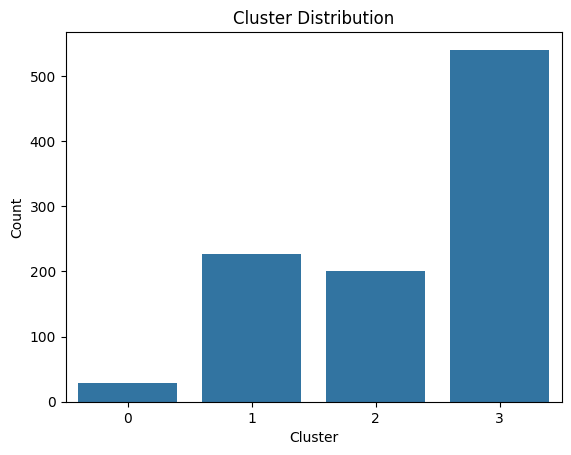

In [ ]:

import seaborn as sns

sns.countplot(x='clusters', data=new_df)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

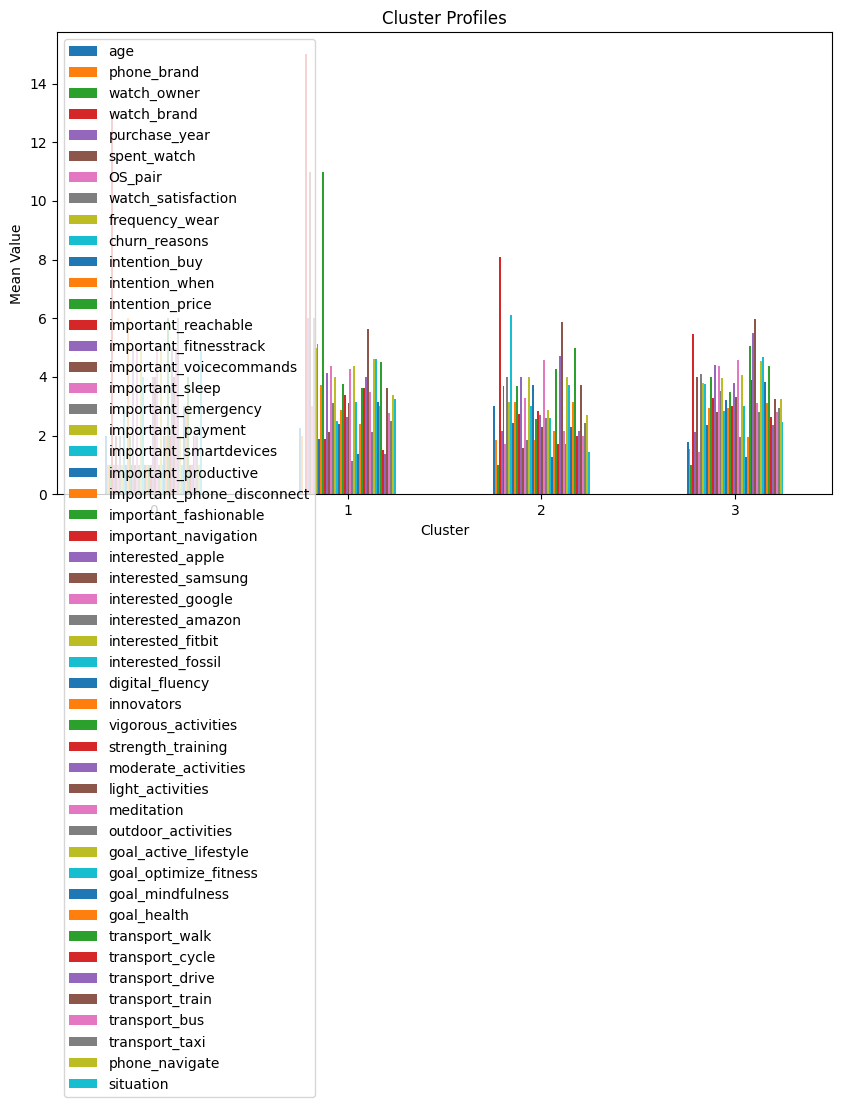

In [ ]:

customer_kmeans_grp.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Profiles')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()

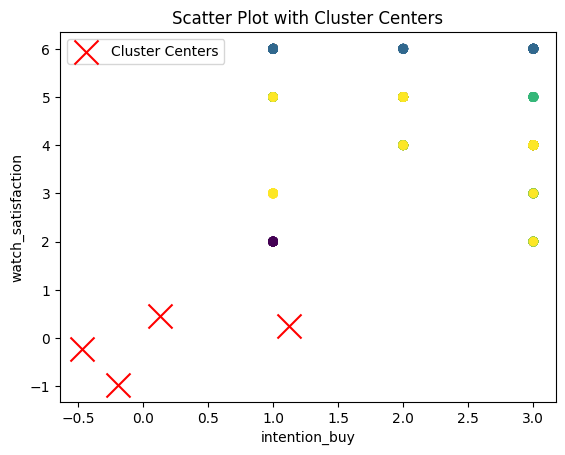

In [ ]:

plt.scatter(new_df['intention_buy'], new_df['watch_satisfaction'], c=new_df['clusters'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Cluster Centers')
plt.title('Scatter Plot with Cluster Centers')
plt.xlabel('intention_buy')
plt.ylabel('watch_satisfaction')
plt.legend()
plt.show()

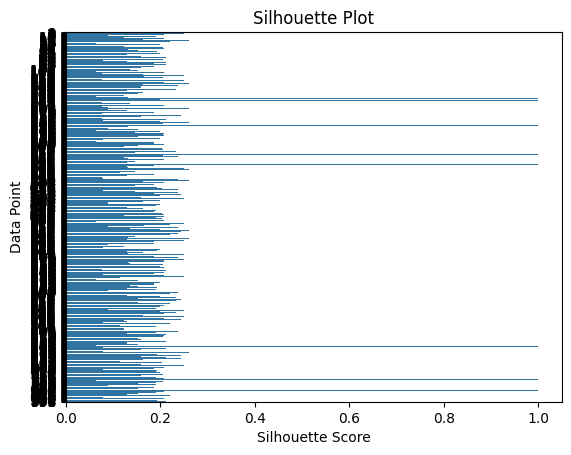

In [ ]:

from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(scaled_data, kmeans.labels_)
sns.barplot(x=silhouette_vals, y=range(len(silhouette_vals)), orient='h')
plt.title('Silhouette Plot')
plt.xlabel('Silhouette Score')
plt.ylabel('Data Point')
plt.show()